# 4. Non Parametric Hypothesis Testing: KS-Score

In [10]:
import numpy as np
from scipy.stats import bernoulli, binom, norm, multivariate_normal
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc, animation
from IPython.core.display import display, HTML
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter

from _plotly_future_ import v4_subplots
import cufflinks
import plotly.plotly as py
import plotly
import plotly.graph_objs as go
from plotly.offline import iplot
import plotly.figure_factory as ff

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

sns.set(style="white", palette="husl")
sns.set_context("talk")
sns.set_style("ticks")

In [106]:
from IPython.core.debugger import set_trace

def debug_decorator(func, *args, **kwargs):
    """
    Allows for debugging of functions via jupyter lab.
    
    Examples:
    
        >>> debug_decorator(some_func_to_debug, some_arg, some_kwarg)()
    
    """
    
    def inner():
        set_trace()
        return func(*args, **kwargs)
    
    return inner

In [ ]:
# TODO
# - When and why doesn't normal apply?
#   - It is incredibly important to know when theorems and equations DO NOT HOLD
#   - Expected value based on law of large numbers
#   - Arrow problem
#   - arrow problem, theoretical expectation 
# - What can we do about it?
#   - KS Score
# - Appendix
#    - limit explanation (https://www.youtube.com/watch?v=kfF40MiS7zA)

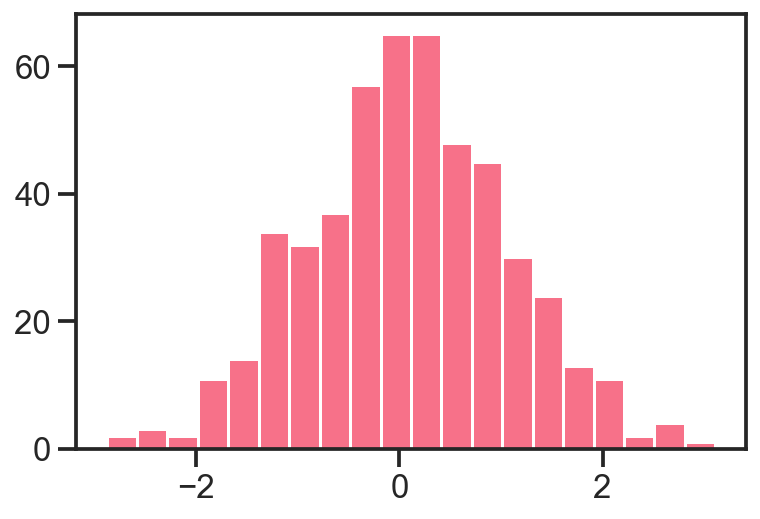

In [22]:
x = np.arange(-3, 3, 0.001)

In [26]:
y = norm.rvs(0, 1, 500)

In [31]:
y = norm.pdf(x, 0, 1)

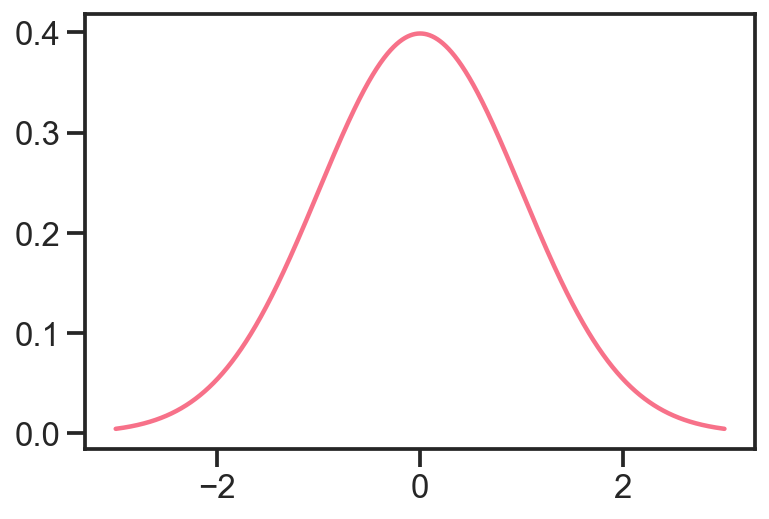

In [32]:
plt.plot(x, y)

In [33]:
y_cdf = norm.cdf(x, 0, 1)

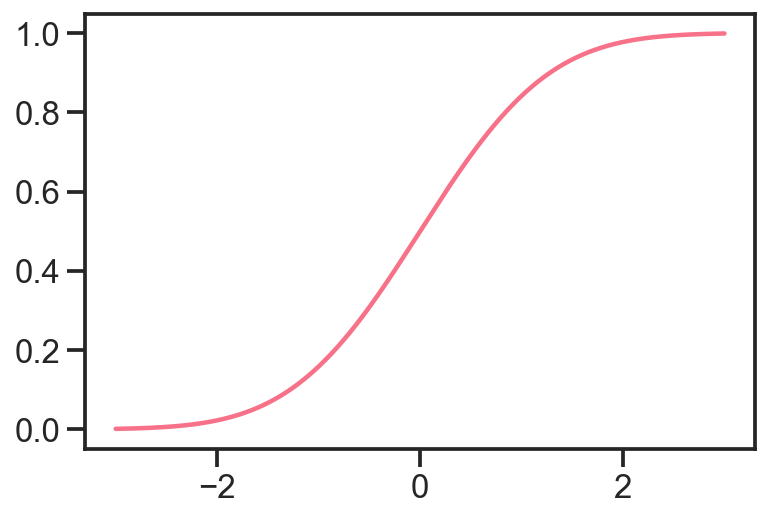

In [34]:
plt.plot(x, y_cdf)

In [63]:
def my_cdf(x):
    x.sort()
    return x, np.arange(0, x.shape[0], 1) / (x.shape[0] - 1)

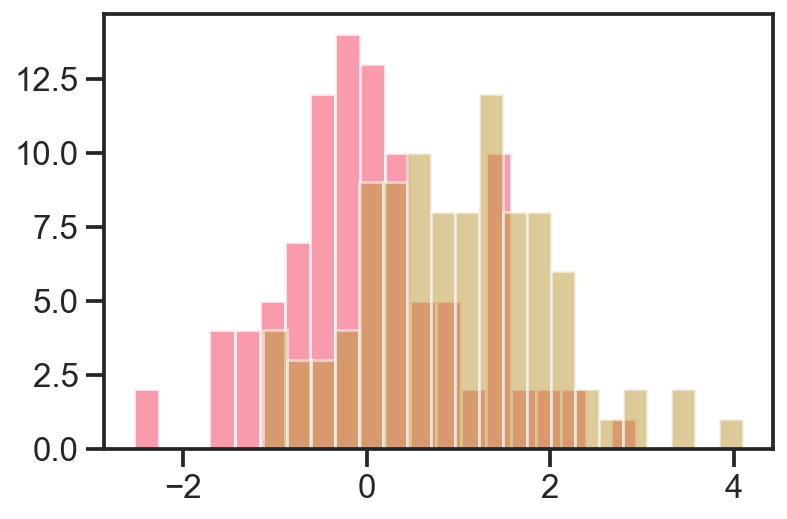

In [90]:
sample_size = 100
a1 = np.random.normal(0, 1, sample_size)
plt.hist(a1, bins=20, alpha=0.7)

sample_size = 100
b1 = np.random.normal(1, 1, sample_size)
plt.hist(b1, bins=20, alpha=0.5)

plt.show()

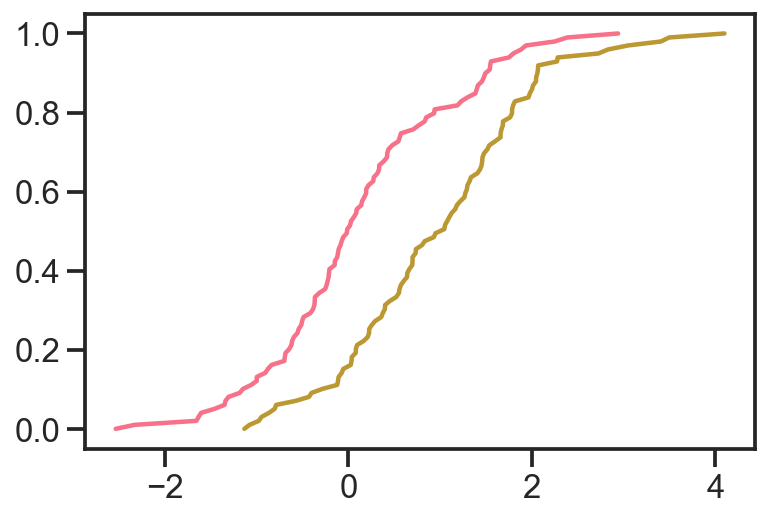

In [92]:
x_axis, y_empirical_cdf = my_cdf(a1)
plt.plot(x_axis, y_empirical_cdf)
x_axis, y_empirical_cdf = my_cdf(b1)
plt.plot(x_axis, y_empirical_cdf)

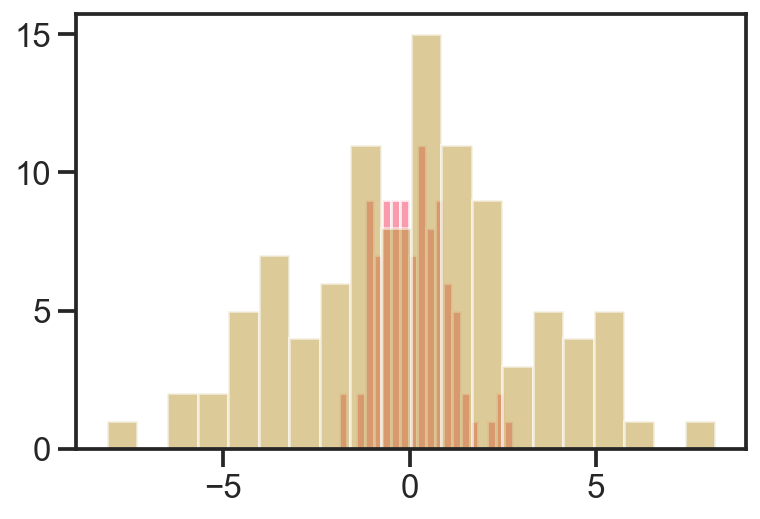

In [94]:
sample_size = 100
a2 = np.random.normal(0, 1, sample_size)
plt.hist(a2, bins=20, alpha=0.7)

sample_size = 100
b2 = np.random.normal(0, 3, sample_size)
plt.hist(b2, bins=20, alpha=0.5)

plt.show()

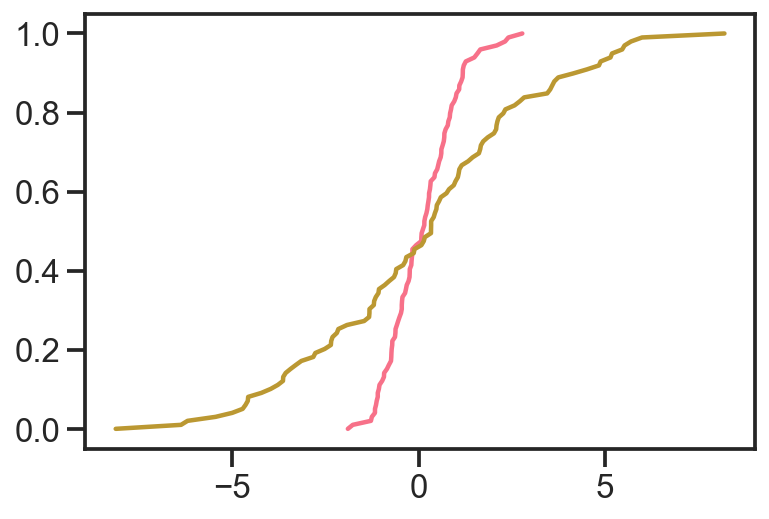

In [95]:
x_axis, y_empirical_cdf = my_cdf(a2)
plt.plot(x_axis, y_empirical_cdf)
x_axis, y_empirical_cdf = my_cdf(b2)
plt.plot(x_axis, y_empirical_cdf)

In [77]:
from scipy.stats import ks_2samp    

In [96]:
ks_2samp(a1, b1)

Ks_2sampResult(statistic=0.39, pvalue=3.5690338557186834e-07)

In [97]:
ks_2samp(a2, b2)

Ks_2sampResult(statistic=0.29, pvalue=0.0004117410017938115)

In [99]:
a.max()

2.3825319974036225

In [ ]:
def my_ks_score(x1, x2):
    
    x1, x1_empirical_cdf = my_cdf(x1)
    x2, x2_empirical_cdf = my_cdf(x2)
    
    return x1_empirical_cdf, x2_empirical_cdf
#     diff = np.abs(x2_empirical_cdf - x1_empirical_cdf)
#     max_diff = diff.max()
    
#     return max_diff
    

In [108]:
# debug_decorator(my_ks_score, a1, a2)()

In [110]:
_, x1_empirical_cdf = my_cdf(a1)

In [111]:
x1_empirical_cdf

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

In [112]:
_, x2_empirical_cdf = my_cdf(a2)

In [113]:
x2_empirical_cdf

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

In [ ]:
# LEAVING OFF
# - Implementation detail (need to enssure that ) Follow scipy source code! https://github.com/scipy/scipy/blob/v0.15.1/scipy/stats/stats.py#L4029